In [1]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\te

In [2]:
pwd

'C:\\Users\\user'

In [3]:
train = pd.read_csv('Hair/hair_dataset.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,img_link,black,brown,blond,Straight,Curly,Wavy,Thick,Thin/fine,Long,short,medium
0,192,0,0,1,0,0,1,0,1,0,0,1
1,191,0,1,0,1,0,0,0,1,1,0,0
2,190,1,0,0,1,0,0,0,1,1,0,0
3,167,0,0,1,1,0,0,0,1,0,0,1
4,168,1,0,0,1,0,0,0,1,0,0,1


In [4]:
train.columns


Index([' img_link', 'black', 'brown', 'blond', 'Straight', 'Curly', 'Wavy',
       'Thick', 'Thin/fine', 'Long', 'short', 'medium'],
      dtype='object')

In [5]:
train_image = []
for i in tqdm(range(1,500)):
    img = image.load_img('Hair/IMG/Images/'+str(i)+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|████████████████████████████████████████| 499/499 [00:22<00:00, 21.97it/s]


In [6]:
train_image1=(train_image[:499])
X1 = np.array(train_image1)

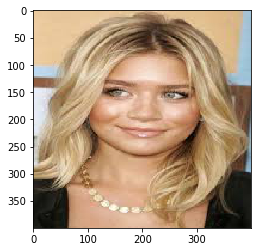

In [7]:
plt.imshow(X1[8])

In [8]:
y = np.array(train.drop([' img_link'],axis=1))
y1=y[0:499]
y1.shape

(499, 11)

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=2, test_size=0.1)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit(X1_train, y1_train, epochs=5, validation_data=(X1_test, y1_test), batch_size=64)


Train on 449 samples, validate on 50 samples
Epoch 1/5


In [ ]:
img = image.load_img('358.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [ ]:
classes = np.array(train.columns[2:])
print(classes)
proba = model.predict(img.reshape(1,400,400,3))
print(proba)
top_3 = np.argsort(proba[0])[:-5:-1]
print(top_3)
for i in range(4):
    print("{}".format(classes[top_3[i]-1])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)